<a href="https://colab.research.google.com/github/mostafizur06/Machine_Learning/blob/main/FinalTask_201_15_13849.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [289]:
data = pd.read_csv('Copy of Kafi.csv')

In [290]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,1,1,3,0


In [291]:
data.isnull().sum()

age          0
sex          0
cp           0
trtbps       0
chol         7
fbs          0
restecg      0
thalachh    13
exng         0
oldpeak      0
slp          0
caa          0
thall        0
output       0
dtype: int64

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      296 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  290 non-null    float64
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [293]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [294]:
columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

for column in columns:
    median = math.floor(data[column].median())
    data[column] = data[column].fillna(median)
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1
5,57,1,0,140,192.0,0,1,148.0,0,0.4,1,0,1,1
6,56,0,1,140,294.0,0,0,153.0,0,1.3,1,0,2,1
7,44,1,1,120,240.0,0,1,173.0,0,0.0,2,0,3,1
8,52,1,2,172,240.0,1,1,162.0,0,0.5,2,0,3,1
9,57,1,2,150,240.0,0,1,174.0,0,1.6,2,0,2,1


In [295]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [296]:
# ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
#        'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
import statsmodels.formula.api as smf
statMDL=smf.ols('output~age+sex+cp+trtbps+chol+fbs+restecg+thalachh+exng+oldpeak+slp+caa+thall', data= data).fit()
print(statMDL.summary())


                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     23.67
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.53e-38
Time:                        15:18:29   Log-Likelihood:                -108.85
No. Observations:                 303   AIC:                             245.7
Df Residuals:                     289   BIC:                             297.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8519      0.294      2.899      0.0

From OLS report Here we can see the value of

*   R-squared = 0.516 [this is not greater than 0.6]
*   Prob (F-statistic) = 2.53e-38 [this is greater than 0.05]
So in this case Regression is not suitable



<Axes: >

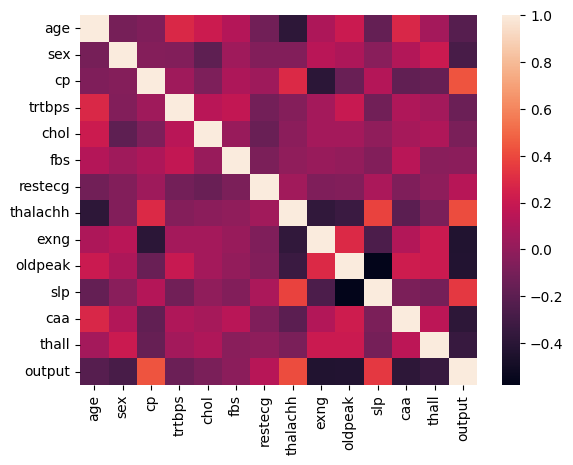

In [297]:
import seaborn as sns
sns.heatmap(data.corr())

## We see here the correlation of 'ouput' with [  'caa', 'thall' ] is very weak.

In [298]:
y= (data['output'])
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [299]:
x = data.drop(['output', 'exng', 'oldpeak'],axis =1)
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,slp,caa,thall
0,63,1,3,145,233.0,1,0,150.0,0,0,1
1,37,1,2,130,250.0,0,1,187.0,0,0,2
2,41,0,1,130,204.0,0,0,172.0,2,0,2
3,56,1,1,120,236.0,0,1,178.0,2,0,2
4,57,0,0,120,354.0,0,1,163.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0,3
299,45,1,3,110,264.0,0,1,132.0,1,0,3
300,68,1,0,144,193.0,1,1,141.0,1,2,3
301,57,1,0,130,131.0,0,1,115.0,1,1,3


In [300]:
from sklearn.preprocessing import Normalizer
x = Normalizer().fit_transform(x)
x

array([[0.19745918, 0.00313427, 0.00940282, ..., 0.        , 0.        ,
        0.00313427],
       [0.10875393, 0.0029393 , 0.00587859, ..., 0.        , 0.        ,
        0.00587859],
       [0.13682639, 0.        , 0.00333723, ..., 0.00667446, 0.        ,
        0.00667446],
       ...,
       [0.23673557, 0.00348141, 0.        , ..., 0.00348141, 0.00696281,
        0.01044422],
       [0.25352621, 0.00444783, 0.        , ..., 0.00444783, 0.00444783,
        0.01334348],
       [0.1749685 , 0.        , 0.00306962, ..., 0.00306962, 0.00306962,
        0.00613925]])

In [301]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)

# ***using KNeighborsClassifire Model***

In [302]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(5, 20, 2):
  print(i)
  knn = KNeighborsClassifier(i)
  knn.fit(xtrain, ytrain)
  print(knn.score(xtest, ytest))

5
0.5573770491803278
7
0.6065573770491803
9
0.6557377049180327
11
0.5737704918032787
13
0.5573770491803278
15
0.6065573770491803
17
0.5573770491803278
19
0.5737704918032787


**from the value of 9 we can get best(63%)**

In [303]:
knn = KNeighborsClassifier(9)
knn.fit(xtrain, ytrain)
print(knn.score(xtest, ytest))

0.6557377049180327


In [304]:
accuracy = knn.score(xtest,ytest)
print('Accuracy of using KNeighborsClassifire Model:',accuracy*100,'%')

Accuracy of using KNeighborsClassifire Model: 65.57377049180327 %


# ***LogisticRegression***

In [305]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
accuracy = logreg.score(xtest,ytest)
print('Accuracy of using LogistricRegression Model:',accuracy*100,'%')

Accuracy of using LogistricRegression Model: 60.65573770491803 %


# ***DecisionTreeClassifier***

In [306]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(xtrain, ytrain)
accuracy = dt.score(xtest,ytest)
print('Accuracy of using DecisionTreeClassifier Model:',accuracy*100,'%')

Accuracy of using DecisionTreeClassifier Model: 68.85245901639344 %


# ***RandomForestClassifier***

In [309]:
# from sklearn.ensemble import RandomForestClassifier
# for i in range(1,20,5):
#   print(i)
#   rf = RandomForestClassifier()
#   rf.fit(xtrain, ytrain)
#   accuracy = rf.score(xtest,ytest)
#   print('Accuracy of using RandomForestClassifier Model:',accuracy*100,'%')

1
Accuracy of using RandomForestClassifier Model: 77.04918032786885 %
2
Accuracy of using RandomForestClassifier Model: 70.49180327868852 %
3
Accuracy of using RandomForestClassifier Model: 77.04918032786885 %
4
Accuracy of using RandomForestClassifier Model: 75.40983606557377 %
5
Accuracy of using RandomForestClassifier Model: 70.49180327868852 %
6
Accuracy of using RandomForestClassifier Model: 77.04918032786885 %
7
Accuracy of using RandomForestClassifier Model: 75.40983606557377 %
8
Accuracy of using RandomForestClassifier Model: 77.04918032786885 %
9
Accuracy of using RandomForestClassifier Model: 77.04918032786885 %
10
Accuracy of using RandomForestClassifier Model: 75.40983606557377 %
11
Accuracy of using RandomForestClassifier Model: 73.77049180327869 %
12
Accuracy of using RandomForestClassifier Model: 70.49180327868852 %
13
Accuracy of using RandomForestClassifier Model: 75.40983606557377 %
14
Accuracy of using RandomForestClassifier Model: 72.1311475409836 %
15
Accuracy of u

In [310]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
accuracy = rf.score(xtest,ytest)
print('Accuracy of using RandomForestClassifier Model:',accuracy*100,'%')

Accuracy of using RandomForestClassifier Model: 77.04918032786885 %


# **GradientBoostingClassifier**

In [308]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(xtrain, ytrain)
accuracy = gb.score(xtest,ytest)
print('Accuracy of using GradientBoostingClassifier Model:',accuracy*100,'%')

Accuracy of using GradientBoostingClassifier Model: 70.49180327868852 %
